
Project Instructions:
https://vlegalwaymayo.atu.ie/pluginfile.php/1804303/mod_resource/content/2/Project%20Description.pdf

Deadline: Monday 12th  January 2026 


Provisional Ideas

Magnificent 7 Stock Prices Analysis - yfinance



# Programming for Data Analytics Big Project 
## Magnificent 7 Stock Price Analysis


This assignment is an analysis of the well known 'magnificent 7' technology companies that dominate the S&P 500 stock exchange. These are the largest techoligical companies in the world & have historically made up a significant % weighting of the market capitalisation of the S&P 500. [Magnificent 7 Stocks: What You Need To Know](https://www.investopedia.com/magnificent-seven-stocks-8402262)

| Company        | Ticker |
|---------------|--------|
| Meta Platforms | META   |
| Apple Inc.     | AAPL   |
| Amazon.com     | AMZN   |
| Tesla.         | TSLA   |
| Alphabet Inc.  | GOOG   |
| Nvidia Corportaion   | NVDA   | 
| Microsoft Corporation  | MSFT   |  

 
The goal of the assigment is to demonstrate tools learned in the module

## Notebook Structure
  
Notebook structure follows below format:

- **1. Libraries Imported**  - Import packages used.
- **2. Data Download** - We use yfinance to download the stock data.
- **3. Clean & Normalise Data**
- **3. Explore Data**
        - Resample (add plots)
        - Rolling Analysis (add plots)
        - Returns (Add plots)



thoughts

get weighting of mag7 in the s&p 500 MARKET CAP
look at % within their sectors maybe
ROLLING BALANCES  - BEST ONE ACROSS A QUARTER,YEAR - CALENDAR AND ROLLING YEAR MAYBE



In [2]:
# 1. Libraries Imported

# Dates & Times. https://atlantictu-my.sharepoint.com/personal/ian_mcloughlin_atu_ie/_layouts/15/stream.aspx?id=%2Fpersonal%2Fian%5Fmcloughlin%5Fatu%5Fie%2FDocuments%2Fstudent%5Fshares%2Fcomputer%2Dinfrastructure%2F22%2Ddatetime%2Emkv&referrer=StreamWebApp%2EWeb&referrerScenario=AddressBarCopied%2Eview%2Eca70c99c%2D5d51%2D4c6a%2D8743%2D670d34da45a7
import datetime as dt

# Data frames
import pandas as pd

# Install yfinance if not already installed
#!pip install yfinance

# Yahoo finance data.
import yfinance as yf

# Plotting
import matplotlib.pyplot as plt

# Folder creation + listing files
import os

import seaborn as sns



# Comments 1 - Download Dataset

i) We'll write a fucntion & download the stock info from yfinance - looking from the 1st Jan 2014 to the 30th Nov 2025 for the magnifcent 7
ii) download s&p 500  https://www.investing.com/academy/trading/what-is-the-sp-500/ & get %

Code is:

```python
df = yf.download("META AAPL AMZN TSLA GOOG NVDA MSFT", start="2014-01-01" ,end='2025-11-30',interval = '1d', group_by='ticker', auto_adjust=True)
```

**yfinance download parameters:**

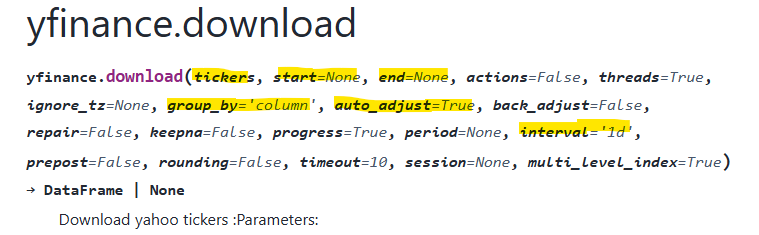


 - **tickers** - We state the company tickers that we need to download pricing information for.
 - **start** - We set the start date we wish to extract the pricing data from as the 1st January 2014.
 - **end** - We set the end date we wish to extract the pricing data from as the 30th November 2025.
 - **interval** - We set the interval time period we want to pull the data from. This can be from 1 minute,hourly, daily up to 3 months - we will use daily pricing data.
 - **group_by** - This sets the order of the columns(headers) - we group the pricing information by **ticker** first and then by **column**, easier to extract pricing datat for one ticker this way. If not stated default is to group by **column** only.
     - This gives a multi-index structure where we have two level headers:
         - Level 0 - Ticker type (META,AAPL,AMZN,TSLA,GOOG,NVDA,MSFT)
         - level 1 - Price type (Open,High,Low,Close,Volume)
 - **auto_adjust** - This adjusts the pricing data to account for stock splits and dividends. Default if not stated is **True**




In [ ]:
 # Set up the function 'get_data()' that can be called for closing prices of FAANG stocks over the last 10 years
   
df = yf.download("META AAPL AMZN TSLA GOOG NVDA MSFT", start="2014-01-01" ,end='2025-11-30',interval = '1d', group_by='ticker', auto_adjust=True)


# References:
# Python functions - https://www.w3schools.com/python/python_functions.asp
# Yfinance Download -  https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html




[*********************100%***********************]  7 of 7 completed


# Comments 2
In order to explore the data, we'll save the file to a csv folder, we will usa a placeholder for the file name.

In [4]:
# Set Filename
filename = "Magnificent 7 Stock Price History - Jan 2015- Nov 2025.csv"

# Save to CSV
df.to_csv(filename)

# Comment 3 - Cleaning

Use df.isnull to check for any null values.
Use df.head
Use df.tail
Use df.info


keep na rows is deafult in yfiance - can discuss this but do check anyway to show how we would clean if nas

In [5]:
# check for null values
df.isnull().sum()
# References:
# Pandas isnull() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html
# Pandas sum() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html


Ticker  Price 
TSLA    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
MSFT    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
GOOG    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
META    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
AAPL    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
NVDA    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
AMZN    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [6]:
# Display the first 5 rows of the dataframe
df.head()


Ticker           TSLA                                                 MSFT  \
Price            Open       High       Low      Close    Volume       Open   
Date                                                                         
2014-01-02   9.986667  10.165333  9.770000  10.006667  92826000  30.988778   
2014-01-03  10.000000  10.146000  9.906667   9.970667  70425000  30.864316   
2014-01-06  10.000000  10.026667  9.682667   9.800000  80416500  30.573921   
2014-01-07   9.841333  10.026667  9.683333   9.957333  75511500  30.142493   
2014-01-08   9.923333  10.246667  9.917333  10.085333  92448000  29.868705   

Ticker                                                 ...      NVDA  \
Price            High        Low      Close    Volume  ...      Open   
Date                                                   ...             
2014-01-02  31.030265  30.781356  30.831139  30632200  ...  0.375278   
2014-01-03  30.880911  30.366503  30.623707  31134800  ...  0.374571   
2014-01-06  30.607109  29.959955  29.976549  43603700  ...  0.373157   
2014-01-07  30.275243  30.042928  30.208866  35802800  ...  0.378107   
2014-01-08  29.984860  29.520238  29.669579  59971700  ...  0.381879   

Ticker                                                    AMZN           \
Price           High       Low     Close     Volume       Open     High   
Date                                                                      
2014-01-02  0.376693  0.370564  0.373864  260092000  19.940001  19.9680   
2014-01-03  0.375278  0.368207  0.369385  259332000  19.914499  20.1355   
2014-01-06  0.377164  0.369621  0.374335  409492000  19.792500  19.8500   
2014-01-07  0.381879  0.375514  0.380464  333288000  19.752001  19.9235   
2014-01-08  0.387536  0.380464  0.385650  308192000  19.923500  20.1500   

Ticker                                      
Price             Low      Close    Volume  
Date                                        
2014-01-02  19.701000  19.898500  42756000  
2014-01-03  19.811001  19.822001  44204000  
2014-01-06  19.421000  19.681499  63412000  
2014-01-07  19.714500  19.901501  38320000  
2014-01-08  19.802000  20.096001  46330000  

[5 rows x 35 columns]

In [7]:
# Info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2996 entries, 2014-01-02 to 2025-11-28
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (TSLA, Open)    2996 non-null   float64
 1   (TSLA, High)    2996 non-null   float64
 2   (TSLA, Low)     2996 non-null   float64
 3   (TSLA, Close)   2996 non-null   float64
 4   (TSLA, Volume)  2996 non-null   int64  
 5   (MSFT, Open)    2996 non-null   float64
 6   (MSFT, High)    2996 non-null   float64
 7   (MSFT, Low)     2996 non-null   float64
 8   (MSFT, Close)   2996 non-null   float64
 9   (MSFT, Volume)  2996 non-null   int64  
 10  (GOOG, Open)    2996 non-null   float64
 11  (GOOG, High)    2996 non-null   float64
 12  (GOOG, Low)     2996 non-null   float64
 13  (GOOG, Close)   2996 non-null   float64
 14  (GOOG, Volume)  2996 non-null   int64  
 15  (META, Open)    2996 non-null   float64
 16  (META, High)    2996 non-null   float64
 17  (META, Low)    

# Comment 4 - Resampling & returns


Financial performance, particularly for hedge funds and asset managers, is typically reported to investors on a monthly or quarterly basis rather than daily. This frequency reduces the noise from daily fluctations oin the stock and allows investors to see the rate of return (ROR) month on month.

For more illiquid asset classes, such as private equity funds,  valuations are often available only on a quarterly basis. This is due to the difficulty in pricing non-publicly traded assets, including buildings, infrastructure projects, and private companies.

Although, in this instance, the Magnificent 7 stocks trade daily, we will resample the data  to more closely reflect a real-world financial reporting scenario in a hedge fund. 

## Step 1 - Resample data

**Pandas resampling**  allows us to customise the time periods for our data into smaller time periods - we will convert the data from daily to (i) **Monthly (month-end prices)** ; (ii) **Quarterly (quarter-end prices)** ; (iii) **Yearly (year-end prices)**. [Reference: pandas - resampling](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling)


See below:

```python
# Resample - Daily to Month/Quarter/Year End pricing
month_end_pricing = df.resample('BME').last()                   
quarter_end_pricing = df.resample('BQE').last() 
yearly_end_pricing = df.resample('BYE').last() 
```
 - **BME/BQE/BYE** is used to group the rows into monthly/quarterly/yearly data. **'B'** represents **Business**, this is applied to Month/Quarter/Yearly End
 - **.last()** is used to select the final prices in the resampled grouped period(s) (monthly/quarterly/yearly)


## Step 2 - Extract Closing Prices only from resampled data

Our data is now grouped as per the above resampled period (**Step 1**), we are displaying **Open, High, Low, Close, Volume** pricing data grouped per each applicable stock.
We now want to extract **Close** pricing information for each stock.
We use the resampled data for the periods (monthly/quarterly/yearly) to now extract the **Close** price only using **.xs**. This allows us to return a specifed section of the dataframe - [Reference: W3 schools. xs() Method](https://www.w3schools.com/python/pandas/ref_df_xs.asp)


 - **'close'** - this is the key parameter we want **'close'**
 - **level=1** - give us access to the price column as it is a multi level index. level=0 would be the tickers.
 - ***axis=1** - points to the columns rather than the default=0 which is the rows. **'close'** is not present in the rows.

```python
# Get closing prices only of resampled data
monthly_close = month_end_pricing.xs('Close', level=1, axis=1)
quarterly_close = quarter_end_pricing.xs('Close', level=1, axis=1)
yearly_close = yearly_end_pricing.xs('Close', level=1, axis=1)
```


## Step 3 - Get % change of returns across the periods (closing prices)

Our data is now grouped with the closing prices only for our resampled periods.  
We will now get the percentage change from the first data point to the second and consecutively thereforth for each data point. This is done using **.pct_change** method  (https://www.w3schools.com/python/pandas/ref_df_pct_change.asp) which by default shows the percantage change between each row - current row - and the previous row. This allows us to see increase/decrease in stock performance across the Month/Quarter/Yearly resampled closing price periods.

 - **.dropna()** - drops the na that will appear for the first row in each of our dataframes as we are comparing the first row against no prior data.  
 -**100** - we multiply by 100 to convert to % terms from decimals as easier to view change in % terms , also mirrors real life scenario comparisons.

```python
# Calculate Monthly/Quarterly/Yearly Returns
monthly_returns = monthly_close.pct_change().dropna() *100              # Multiply by 100 as to get percentage returns - decimals hard to easily read
quarterly_returns = quarterly_close.pct_change().dropna() *100
yearly_returns = yearly_close.pct_change().dropna() *100
```


These time horizons are how hedge funds performance & rate of return is presented in marketing materials to existing investors & prospective investors, allowing for easier comparison across the industry.


In [ ]:
# Month end closing prices - standard in industry to use month end prices for analysis
# References:
# Pandas Resample - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
# Pandas Offset Aliases - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

# Resample - Daily to Month/Quarter/Year End pricing
month_end_pricing = df.resample('BME').last()                   # Used Business month end(BME) rather than month end (ME) as stocks open on business days only, accounted for in yfinance data already
quarter_end_pricing = df.resample('BQE').last() 
yearly_end_pricing = df.resample('BYE').last()  


# Get closing prices only of resampled data
monthly_close = month_end_pricing.xs('Close', level=1, axis=1)
quarterly_close = quarter_end_pricing.xs('Close', level=1, axis=1)
yearly_close = yearly_end_pricing.xs('Close', level=1, axis=1)

# pct_change()= % change between current & previous row
# https://www.w3schools.com/python/pandas/ref_df_pct_change.asp

# Calculate Monthly/Quarterly/Yearly Returns
monthly_returns = monthly_close.pct_change().dropna() *100              # Multiply by 100 as to get percentage returns - decimals hard to easily read
quarterly_returns = quarterly_close.pct_change().dropna() *100
yearly_returns = yearly_close.pct_change().dropna() *100




Ticker,TSLA,MSFT,GOOG,META,AAPL,NVDA,AMZN
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,3.937110,2.139667,1.944521,2.124041,2.344341,5.255970,2.190561
std,17.589615,6.145524,7.053624,9.561289,7.684831,12.995223,8.714185
min,-36.733435,-13.024753,-17.674970,-32.634230,-18.119758,-32.027408,-23.752509
25%,-7.584367,-1.505760,-2.089029,-3.711357,-3.253795,-2.617003,-3.995964
50%,0.830082,2.049304,1.728956,1.731821,2.782264,4.931265,2.246525
75%,12.169052,5.991106,6.649241,8.078816,7.754307,13.040381,7.506301
max,74.145213,19.626126,20.191716,27.156926,21.656913,38.544573,27.059597


In [ ]:
# Comment 4 - Resampling & returns

# Display summary statistics of monthly returns
monthly_returns.describe()

## Comment 4 - Resampling & returns - Description:

We can see from the above:

**mean** - This shows the average month on month return across the period ( Jan 1st 2104 - 30th Novemebr 2025)
     - Monthly average returns are positive for all stocks, with range between 1.9% - 5.25%.
     - **Nividia** has the highest monthly average return with a healthy 5.25% increase
     - **Google** has the lowest monthly average return with 1.94%

**std** - This shows the standard deviation (how much the returns vary) across the period.
     - 

**min** -

**25%** -

**50%** -

**75%** -

**max** -


Exapnd on decribe individual breakdown





Tesla stock max jump of 74.14% is genuine for month on month on month appreciation
[Tesla stock jump](https://www.cnbc.com/2020/08/31/apple-tesla-jump-as-stock-splits-take-effect.html?msockid=11017dd644a966b708f66faa45d66739)

# Comment 5 - 
1. Plot closing prices across the time horizon for the stock, setting x+ y lables, legend

Shows groth in stock vidsually but does not show returns numerically


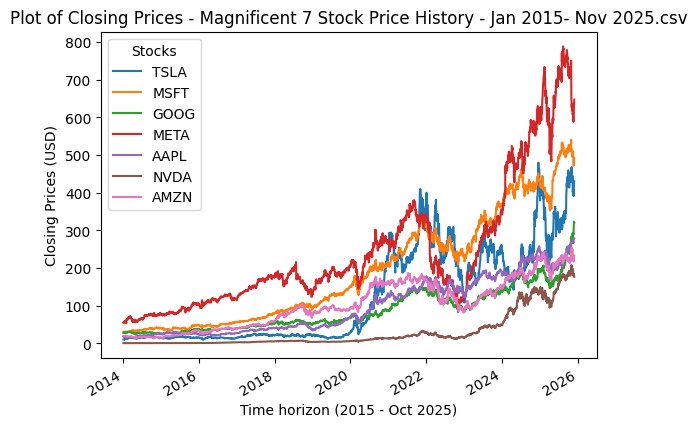

In [9]:
#Closing prices for 7 stocks - put as variable so can easily amend single line if future stocks added
#closing_Prices = df['Close'] - Can't use as multiindex dataframe
# get closing prices only from multiindex dataframe
closing_prices= df.xs('Close', level=1, axis=1)    # https://www.w3schools.com/python/pandas/ref_df_xs.asp     # xs() function to extract cross-section of data from multiindex dataframe
# References:
# Pandas MultiIndexing - https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-multiindexing


#Creat new figure and axis
fig, ax = plt.subplots()
# References: 
# Matplotlib subplots - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

# Plot closing prices
closing_prices.plot(ax=ax)

# Labels xlabel and ylabel
ax.set_xlabel("Time horizon (2015 - Oct 2025)")
ax.set_ylabel("Closing Prices (USD)")
#Title
ax.set_title(f"Plot of Closing Prices - {filename}" )

#Legend
ax.legend(title="Stocks", loc="best")

print(f'Shows groth in stock vidsually but does not show returns numerically')



Comment  6
stock price ( as above)
Mean Stcok Price each day
Mean stock price each month
Rolling Stock Price

In [10]:
# Plot the stock prices - as above   
# ii) Plot the mean temperature each day - can't do as can only get last 60 days from yfinance free API
# iii) Plot the mean temperature for each month
# iv)#ii)The rolling windspeed (say over 24 hours)


# Will get the daily average stock price & plot this
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases



#Refernce to weather code from previous assignments
#df_daily_temp = df.resample("D").mean(numeric_only=True) # 'D' = daily frequency

# can't use 'date' as x index as used as index & no longer a column
#sns.lineplot(data=df_daily_temp, x=df_daily_temp.index, y="temp")

#plt.title("Daily Mean Temperature")
#plt.xlabel("Date")
#plt.ylabel("Temperature(°C)")
#plt.show()



In [11]:
# A)
# iii) Plot the mean closing stock price for each month

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases


df_mean_monthly_price = closing_prices.resample("ME").mean(numeric_only=True) # 'ME' = month end frequency,groups data by month & labels by month end date

df_mean_monthly_price.head()



Ticker,TSLA,MSFT,GOOG,META,AAPL,NVDA,AMZN
Date,,,,,,,
2014-01-31,10.936794,30.159481,28.092582,56.533192,16.670215,0.372910,19.743167
2014-02-28,13.734877,31.009997,29.422623,65.910123,16.416073,0.408585,17.716842
2014-03-31,15.543111,32.588055,29.237683,66.627915,16.637966,0.431469,18.131524
2014-04-30,13.885841,33.548550,26.727042,59.193183,16.883223,0.440613,16.082071
2014-05-31,13.311619,33.515894,26.431316,59.670326,18.902070,0.437373,15.147691


In [12]:
# Get the % returns for each stock since start of data to end of data

df_percent_returns = (df_mean_monthly_price / df_mean_monthly_price.iloc[0] - 1) * 100


# Get the monthly returns for each stock
df_returns = df_mean_monthly_price.pct_change() * 100

# Calculate mean returns for each stock
mean_returns = df_returns.mean()

# Volatility - standard deviation of returns
volatility = df_returns.std()



ValueError: Could not interpret value `NFLX` for `y`. An entry with this name does not appear in `data`.

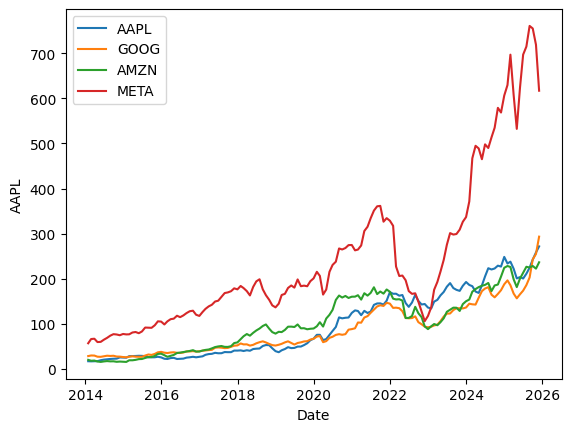

In [13]:
# can't use date as x index as used as index & no longer a column
sns.lineplot(data=df_mean_monthly_price, x=df_mean_monthly_price.index, y="AAPL", label="AAPL")
sns.lineplot(data=df_mean_monthly_price, x=df_mean_monthly_price.index, y="GOOG", label="GOOG")
sns.lineplot(data=df_mean_monthly_price, x=df_mean_monthly_price.index, y="AMZN", label="AMZN")
sns.lineplot(data=df_mean_monthly_price, x=df_mean_monthly_price.index, y="META", label="META")
sns.lineplot(data=df_mean_monthly_price, x=df_mean_monthly_price.index, y="NFLX", label="NFLX")
sns.lineplot(data=df_mean_monthly_price, x=df_mean_monthly_price.index, y="NVDA", label="NVDA")
sns.lineplot(data=df_mean_monthly_price, x=df_mean_monthly_price.index, y="MSFT", label="MSFT")


plt.title("Monthly Mean Closing Stock price")
plt.figure(figsize=(14,6))
plt.xlabel("Date")
plt.ylabel("Price(USD)")
plt.show()